In [27]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x1_train = x_train / 255
x_test = x_test / 255

y1_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
model = keras.Sequential() # Создаём модель
model.add(Flatten(input_shape=(28, 28, 1))) # Добавляем слой, который будет принимать изображение (28,28,1), после чего он это изображение превращает в вектор (784,)
model.add(Dense(64, activation="relu", name="hidden_1")) # первый полносвязный слой,
# где 64 нейрона и функция активации "relu", тут можете экспериментировать с этими двумя показателями,
# также доавлять новые слои
model.add(Dense(10, activation="softmax", name="output")) # Выходной слой (обязательно), 10 выходов ,потому что , у нас 10 цифр от 0 до 9, функция активации "softmax" - это самая оптимальная функция для последнего слоя, можно еще попробовать "sigmoid", но могу возникнуть проблемы с этой функцией в дальнейшем

model.summary() #  выводим строение нашей сети

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(
    loss='categorical_crossentropy', # Выбираю ошибку
    metrics=['accuracy'], # Метрика оценки работы сети
    optimizer="adam" # Выбираю оптимизатор для модели
)
his = model.fit(
    x1_train,  # Подаём на вход данные, которые подаются в НС
    y1_train,  # Данные которые мы требуем на выходе нейронной сети,
    epochs=20, # Количество эпох
    validation_split=0.2,  # validation_split=0.2 - значит, что 20% тренировочной выборки будет использоваться для
    # проверки работоспособности сети на данных которых она не видела(не тренировалась, просто для статистики)
    batch_size=32 #  Размер батча, т.е. сколько изображений мы подаём на вход, чтобы расчитать по ним градиент, это делается для того, чтобы более эффективно находить оптимальное решение
) # fit - это метод для обучения модели,

Epoch 1/20
1500/1500 [==============================] - 1s 726us/step - loss: 0.3393 - accuracy: 0.9044 - val_loss: 0.1908 - val_accuracy: 0.9475
Epoch 2/20
1500/1500 [==============================] - 1s 658us/step - loss: 0.1670 - accuracy: 0.9514 - val_loss: 0.1462 - val_accuracy: 0.9572
Epoch 3/20
1500/1500 [==============================] - 1s 657us/step - loss: 0.1225 - accuracy: 0.9638 - val_loss: 0.1258 - val_accuracy: 0.9641
Epoch 4/20
1500/1500 [==============================] - 1s 689us/step - loss: 0.0962 - accuracy: 0.9714 - val_loss: 0.1193 - val_accuracy: 0.9653
Epoch 5/20
1500/1500 [==============================] - 1s 729us/step - loss: 0.0792 - accuracy: 0.9768 - val_loss: 0.1057 - val_accuracy: 0.9699
Epoch 6/20
1500/1500 [==============================] - 1s 668us/step - loss: 0.0672 - accuracy: 0.9798 - val_loss: 0.1104 - val_accuracy: 0.9688
Epoch 7/20
1500/1500 [==============================] - 1s 626us/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.1016 -

In [31]:
model.save("Model_ex_256", save_format="h5") # сохраняю модель в диск в формате h5 - формат необязательно указывать,
# но в рамках данного урока, лучше сохранять именно в таком формате, для чего узнаем в будущем.

In [32]:
model.evaluate(x_train, to_categorical(y_train, 10)) # Проверяем модель на тестовой выборке
# 1) loss 2) accuracy

1875/1875 [==============================] - 1s 378us/step - loss: 7.2650 - accuracy: 0.9901


[7.264956474304199, 0.9901000261306763]

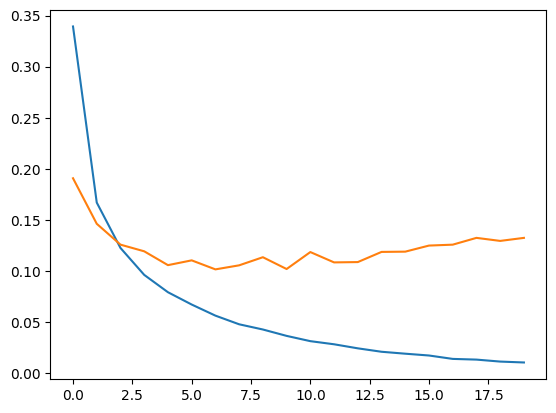

In [33]:
import matplotlib.pyplot as plt  # Импортируем модуль для вывода графиков

h = his.history
plt.plot(h["loss"]) # синяя линия - ошибка на тренировочной выборке
plt.plot(h["val_loss"]) # оранжевая линия - это ошибка на валидационной выборке
plt.show() # Выводим график

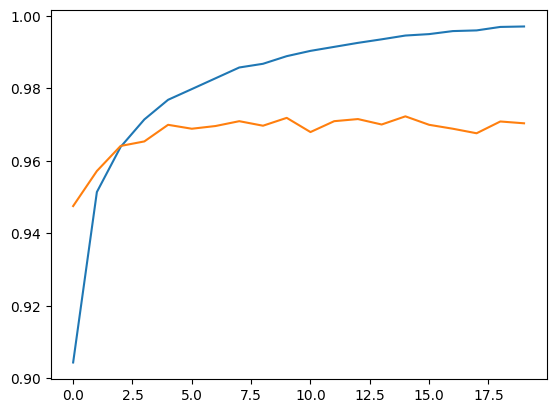

In [34]:
plt.plot(h['accuracy'])  # статистика по работе сети на тренировочной выборке синий цвет
plt.plot(h['val_accuracy']) # статистика по работе сети на валидационной выборке оранжевый цвет
plt.show()
# на моём графике отчетливо видно, что после 3-7 эпохи расхождение между графиками все большое и больше - это значит,
# что нейронная сеть начала переобучаться, чтобы это исправить можно понизить количество нейронов на слоях(кроме последнего),
# так же можно использовать регулизаторы(L1,L2,Dropout). Советую попробовать Dropout*, синтаксис такой <<< Dropout(0.3)
# - 0.3 значит будет на предыдущем слое будет случайно отброшено 30% нейронов, что позволит сети пользоваться
# частичным описанием признаков, тем самым она сможет использовать свои нейроны более эффективно.
# Прочитать подробней про него можно тут https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
# этот материал со *, т.к. является дополнительный.

In [35]:
# Этот материал необязательный, дело в том, что наша база данных устроена так, что цифры расположены посередине, из-за чего наша модель способна распознавать,
model2 = keras.Sequential([ # Еще один способ как можно создавать модель
    Input((28,28,1)),  # так можно задавать размерность входных данных
    Flatten(), # Превращает одноканальное изображение в вектор
    Dense(64, activation="relu", name="hidden_1"),
    Dense(10, activation="softmax", name="output")
])
model2.summary()

import extensionbase # Импортируем модуль, который расширяет, нашу базу данных в 77 раз

sd = 50 # sd - size drop - чем меньше этот параметр, тем лучше, но кушает много оперативки, оптимально 100,
gen = extensionbase.gen_extension_base(x_train, y_train, size_drop=sd)

av = []
ah = []

model2.compile(optimizer="adam",  # Выбираю оптимизатор для модели
               loss='categorical_crossentropy',  # Выбираю ошибку
               metrics=['accuracy'])  # Метрика оценки работы сети

for i in range(2):
    for j in range(sd):
        x, y = next(gen)
        h = model2.fit(x, y, validation_split=0.25, shuffle=True,batch_size=77).history
        av.append(h["val_accuracy"])
        ah.append(h["accuracy"])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
900/900 [==============================] - 1s 844us/step - loss: 0.1105 - accuracy: 0.9678 - val_loss: 0.1003 - val_accuracy: 0.9691


In [36]:
model2.save("Model ex2 64")

INFO:tensorflow:Assets written to: Model ex2 64/assets


INFO:tensorflow:Assets written to: Model ex2 64/assets


In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 410us/step - loss: 0.1206 - accuracy: 0.9728


[0.12055832147598267, 0.9728000164031982]

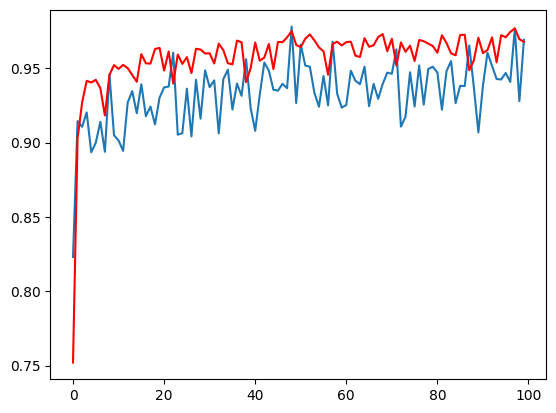

In [38]:
plt.plot(av)
plt.plot(ah,c="r")
plt.show()